In [815]:
# import os
# os.environ["PATH"] += os.pathsep + 'D:\TA\Graphviz\bin'
import numpy as np 
import pandas as pd 	
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
import seaborn as sns
import joblib
import math
import mysql.connector
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_val_score
import pickle
from sklearn.model_selection import train_test_split
from graphviz import Digraph


In [816]:
# loaded_model =  pickle.load(open("naive_bayes_model35.pkl","rb"))

In [817]:
def create_connection():
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",
        database="streamlit" )
    return conn

In [818]:
def all_data():
        conn = create_connection()
        cursor = conn.cursor()
        query = "SELECT * FROM datalatih"
        cursor.execute(query)
        data = cursor.fetchall()
        return data

In [819]:
def accuracy_score(y_true, y_pred):
        return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)
# NB 1
def pre_processing(df):
        X = df.drop([df.columns[-1]], axis = 1)
        y = df[df.columns[-1]]
        return X, y
# NB 2
class NaiveBayes:
        def __init__(self):
            self.features = {}
            self.prob_label = {}
            self.likelihoods = {}
            self.pred_priors = {}

            self.prior = {}
            self.likelihood = {}
            self.evidence = {}

            self.X_train = np.array
            self.y_train = np.array
            self.train_size = int
            self.alpha = 1

        def fit(self, X, y, alpha=1):
            self.alpha = alpha  # Store the alpha value for Laplace smoothing
            self.features = list(X.columns)
            self.X_train = X
            self.y_train = y
            self.train_size = X.shape[0]

            for feature in self.features:
                self.likelihoods[feature] = {}
                self.pred_priors[feature] = {}

                for feat_val in np.unique(self.X_train[feature]):
                    self.pred_priors[feature].update({feat_val: 0})

                    for hasil in np.unique(self.y_train):
                        self.likelihoods[feature].update({feat_val + '_' + hasil: 0})
                        self.prob_label.update({hasil: 0})

            self._calc_class_prior()
            self._calc_likelihoods()
            self._calc_predictor_prior()
                        
        def _calc_class_prior(self):

            # P(c) - Prior Class Probability 

            for hasil in np.unique(self.y_train):
                hasil_count = sum(self.y_train == hasil)
                self.prob_label[hasil] = hasil_count / self.train_size

      
        def _calc_likelihoods(self):
            for feature in self.features:
                for feat_val in np.unique(self.X_train[feature]):
                    for hasil in np.unique(self.y_train):
                        hasil_count = sum(self.y_train == hasil)

                        # Apply Laplace smoothing
                        num = sum((self.X_train[feature] == feat_val) & (self.y_train == hasil)) + self.alpha
                        denom = hasil_count + self.alpha * len(np.unique(self.X_train[feature]))

                        self.likelihoods[feature][feat_val + '_' + hasil] = num / denom

        def _calc_predictor_prior(self):

            # P(x) - Evidence 
            for feature in self.features:
                feat_vals = self.X_train[feature].value_counts().to_dict()

                for feat_val, count in feat_vals.items():
                    self.pred_priors[feature][feat_val] = count / self.train_size

        def predict(self, X):

            # Calculates Posterior probability P(c|x) 
            results = []
            X = np.array(X)

            for i in X:
                probs_hasil = {}
                for hasil in np.unique(self.y_train):
                    prior = self.prob_label[hasil]
                    likelihood = 1
                    evidence = 1

                    for feat, feat_val in zip(self.features, i):
                        likelihood *= self.likelihoods[feat][feat_val + '_' + hasil]
                        evidence *= self.pred_priors[feat][feat_val]

                    posterior = (likelihood * prior) / evidence
                    probs_hasil[hasil] = posterior  

                result = max(probs_hasil, key=lambda x: probs_hasil[x])
                results.append(result)

            return np.array(results)

        
        # def predictt(self, X):

        #     # Calculates Posterior probability P(c|x)
            
        #     resultss = []
        #     X = np.array(X)

        #     for query in X:
        #         probs_hasil = {}
        #         for hasil in np.unique(self.y_train):
        #             prior = self.prob_label[hasil]
        #             likelihood = 1
        #             evidence = 1

        #             for feat, feat_val in zip(self.features, query):
        #                 likelihood *= self.likelihoods[feat][feat_val + '_' + hasil]
        #                 evidence *= self.pred_priors[feat][feat_val]

        #             posterior = (likelihood * prior) / (evidence)
        #             probs_hasil[hasil] = posterior
                    
        #         result = probs_hasil
        #         # result = max(probs_hasil, key = lambda x: probs_hasil[x])
        #         resultss.append(result)
        #         # st.write(print("Posterior =  ", probs_hasil))
        #     return (resultss)
        
        # def save_model(self, file_path):
        #     joblib.dump(self, file_path)
                 
        # @staticmethod
        # def load_model(file_path):
        #     with open(file_path, 'rb') as file:
        #         return pickle.load(file)



# def display_naive_bayes_flowchart_ascii():
#     flowchart_ascii = """
#  Start
#  |
#  |--> fit(X, y)
#  |     |
#  |     |--> _calc_class_prior()
#  |     |     |
#  |     |     |--> Menghitung probabilitas kemunculan setiap kelas [Layak] dan [Tidak Layak]
#  |     |
#  |     |--> _calc_likelihoods()
#  |     |     |
#  |     |     |--> Calculate likelihood probabilities for each feature and class
#  |     |
#  |     |--> _calc_predictor_prior()
#  |           |
#  |           |--> Calculate evidence probabilities for each feature
#  |
#  |--> predict(X)
#        |
#        |--> Predict the class labels for the given input data
#        |
#        |--> Calculate posterior probability for each class label
#        |
#        |--> Return the predicted class labels
#  End
#     """

#     print(flowchart_ascii)

In [820]:
# display_naive_bayes_flowchart_ascii()

In [821]:
d1 = all_data()
df = pd.DataFrame(d1, columns=["NIK" , "nama", "alamat", "jenis_pkj", "jml_phsl", "jml_art", "pengeluaran", "status_tmpt","klasifikasi"])
df2 = df.loc[:,'jenis_pkj':'klasifikasi']
X,y  = pre_processing(df2)

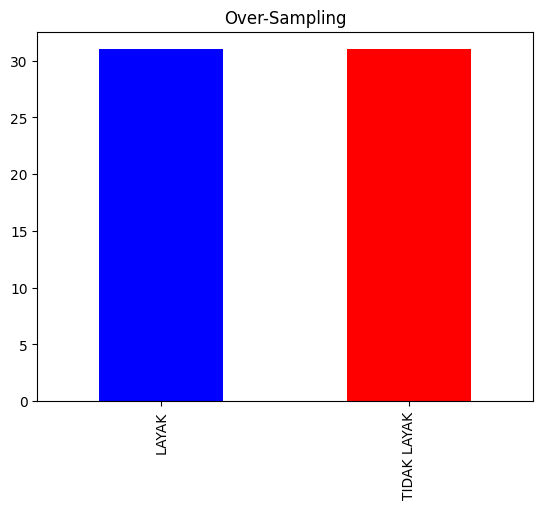

In [822]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)
ax= y.value_counts().plot(kind = 'bar', color = ['blue', 'red'])
# ax= y_resampled.value_counts().plot(autopct='%.2f')
_ = ax.set_title("Over-Sampling")

In [823]:
# from imblearn.under_sampling import RandomUnderSampler
# ros = RandomUnderSampler()
# X, y = ros.fit_resample(X, y)
# ax= y.value_counts().plot(kind = 'bar', color = ['blue', 'red'])
# # ax= y_resampled.value_counts().plot(autopct='%.2f')
# _ = ax.set_title("Over-Sampling")


In [824]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((49, 5), (13, 5), (49,), (13,))

In [825]:
# X_train.head(50)

In [826]:
X_train.columns

Index(['jenis_pkj', 'jml_phsl', 'jml_art', 'pengeluaran', 'status_tmpt'], dtype='object')

In [827]:
df_resampled = pd.concat([X_train,y_train],axis=1)
df_resampled

,jenis_pkj,jml_phsl,jml_art,pengeluaran,status_tmpt,klasifikasi
18,PETANI,Rp.0 - Rp.1500000,kurang dari 3 orang,Rp.50.000 - Rp.100.000,MILIK SENDIRI,LAYAK
56,PNS,Rp.1500000 - Rp.3000000,lebih dari 5 orang,lebih Rp.100.000,NUMPANG,TIDAK LAYAK
13,PETANI,Rp.1500000 - Rp.3000000,lebih dari 5 orang,Rp.50.000 - Rp.100.000,NUMPANG,LAYAK
51,PEDAGANG,Rp.1500000 - Rp.3000000,kurang dari 3 orang,kurang Rp.50.000,NUMPANG,TIDAK LAYAK
44,PNS,Lebih Dari 3000000,lebih dari 5 orang,kurang Rp.50.000,SEWA,TIDAK LAYAK
16,PETANI,Rp.0 - Rp.1500000,lebih dari 5 orang,lebih Rp.100.000,MILIK SENDIRI,LAYAK
10,PETANI,Rp.0 - Rp.1500000,kurang dari 3 orang,kurang Rp.50.000,MILIK SENDIRI,LAYAK
24,PNS,Rp.1500000 - Rp.3000000,lebih dari 5 orang,lebih Rp.100.000,NUMPANG,TIDAK LAYAK
42,WIRASWASTA,Lebih Dari 3000000,3-5 Orang,lebih Rp.100.000,MILIK SENDIRI,TIDAK LAYAK
34,PEDAGANG,Rp.1500000 - Rp.3000000,kurang dari 3 orang,lebih Rp.100.000,SEWA,LAYAK


In [828]:
# df_resampled.to_excel('Latih3050V1_Under.xlsx', header=True, index=False)

In [829]:
df_test = pd.concat([X_test,y_test],axis=1)
df_test

,jenis_pkj,jml_phsl,jml_art,pengeluaran,status_tmpt,klasifikasi
1,PEDAGANG,Rp.1500000 - Rp.3000000,kurang dari 3 orang,kurang Rp.50.000,NUMPANG,TIDAK LAYAK
53,PNS,Lebih Dari 3000000,3-5 Orang,lebih Rp.100.000,MILIK SENDIRI,TIDAK LAYAK
23,PNS,Lebih Dari 3000000,3-5 Orang,Rp.50.000 - Rp.100.000,SEWA,TIDAK LAYAK
17,PETANI,Rp.0 - Rp.1500000,lebih dari 5 orang,Rp.50.000 - Rp.100.000,MILIK SENDIRI,LAYAK
50,PNS,Lebih Dari 3000000,3-5 Orang,lebih Rp.100.000,MILIK SENDIRI,TIDAK LAYAK
49,WIRASWASTA,Rp.0 - Rp.1500000,kurang dari 3 orang,kurang Rp.50.000,NUMPANG,LAYAK
57,PEDAGANG,Rp.1500000 - Rp.3000000,3-5 Orang,Rp.50.000 - Rp.100.000,SEWA,TIDAK LAYAK
29,BURUH,Rp.0 - Rp.1500000,3-5 Orang,kurang Rp.50.000,MILIK SENDIRI,LAYAK
8,PEDAGANG,Rp.0 - Rp.1500000,kurang dari 3 orang,kurang Rp.50.000,MILIK SENDIRI,LAYAK
43,WIRASWASTA,Rp.0 - Rp.1500000,3-5 Orang,lebih Rp.100.000,MILIK SENDIRI,LAYAK


In [830]:
# df_test.to_excel('Uji3050V1_Under.xlsx', header=True, index=False)

In [831]:
   
nb_clf = NaiveBayes()
nb_clf.fit(X_train, y_train)


# # Create a directed graph to represent the flowchart
# dot = Digraph(comment='Naive Bayes Flowchart', format='png')

# # Add nodes for each function
# dot.node('Start', 'Start', shape='oval')
# dot.node('fit', 'fit(X, y)')
# dot.node('_calc_class_prior', '_calc_class_prior()')
# dot.node('_calc_likelihoods', '_calc_likelihoods()')
# dot.node('_calc_predictor_prior', '_calc_predictor_prior()')
# dot.node('predict', 'predict(X)')
# dot.node('End', 'End', shape='oval')

# # Add edges to connect the nodes
# dot.edges([
#     ('Start', 'fit'),
#     ('fit', '_calc_class_prior'),
#     ('_calc_class_prior', '_calc_likelihoods'),
#     ('_calc_likelihoods', '_calc_predictor_prior'),
#     ('_calc_predictor_prior', 'End'),
#     ('fit', 'predict'),
#     ('predict', 'End'),
# ])

# # Render the flowchart to a file (e.g., PNG)
# dot.render('naive_bayes_class_flowchart', view=True)


In [832]:
# nb_clf.save_model('naive_bayes_model35.joblib') 

In [833]:
print("\nClsss Prior: ", nb_clf.prob_label)
print("\nLikelihoods: ", nb_clf.likelihoods)
print("\nEvident: ", nb_clf.pred_priors)
print()


Clsss Prior:  {'LAYAK': 0.5102040816326531, 'TIDAK LAYAK': 0.4897959183673469}

Likelihoods:  {'jenis_pkj': {'BURUH_LAYAK': 0.0967741935483871, 'BURUH_TIDAK LAYAK': 0.16666666666666666, 'PEDAGANG_LAYAK': 0.3548387096774194, 'PEDAGANG_TIDAK LAYAK': 0.2, 'PETANI_LAYAK': 0.3548387096774194, 'PETANI_TIDAK LAYAK': 0.03333333333333333, 'PNS_LAYAK': 0.03225806451612903, 'PNS_TIDAK LAYAK': 0.4666666666666667, 'TIDAK BEKERJA_LAYAK': 0.12903225806451613, 'TIDAK BEKERJA_TIDAK LAYAK': 0.03333333333333333, 'WIRASWASTA_LAYAK': 0.03225806451612903, 'WIRASWASTA_TIDAK LAYAK': 0.1}, 'jml_phsl': {'Lebih Dari 3000000_LAYAK': 0.07142857142857142, 'Lebih Dari 3000000_TIDAK LAYAK': 0.3333333333333333, 'Rp.0 - Rp.1500000_LAYAK': 0.5357142857142857, 'Rp.0 - Rp.1500000_TIDAK LAYAK': 0.037037037037037035, 'Rp.1500000 - Rp.3000000_LAYAK': 0.39285714285714285, 'Rp.1500000 - Rp.3000000_TIDAK LAYAK': 0.6296296296296297}, 'jml_art': {'3-5 Orang_LAYAK': 0.39285714285714285, '3-5 Orang_TIDAK LAYAK': 0.4074074074074074

In [834]:
print("Train Accuracy: {} ".format(accuracy_score(y_train, nb_clf.predict(X_train))))
print("Test Accuracy: {} ".format(accuracy_score(y_test, nb_clf.predict(X_test))))

Train Accuracy: 89.8 
Test Accuracy: 76.92 


In [835]:
print("Train Accuracy: {} ".format(accuracy_score(y_test, nb_clf.predict(X_test))))

Train Accuracy: 76.92 


In [836]:
# y_resampled.head(40)

In [837]:
y_pred = nb_clf.predict(X_train)
y_pred

array(['LAYAK', 'TIDAK LAYAK', 'LAYAK', 'LAYAK', 'TIDAK LAYAK', 'LAYAK',
       'LAYAK', 'TIDAK LAYAK', 'TIDAK LAYAK', 'LAYAK', 'LAYAK', 'LAYAK',
       'LAYAK', 'LAYAK', 'TIDAK LAYAK', 'LAYAK', 'LAYAK', 'LAYAK',
       'TIDAK LAYAK', 'TIDAK LAYAK', 'LAYAK', 'LAYAK', 'TIDAK LAYAK',
       'TIDAK LAYAK', 'TIDAK LAYAK', 'TIDAK LAYAK', 'TIDAK LAYAK',
       'TIDAK LAYAK', 'LAYAK', 'LAYAK', 'TIDAK LAYAK', 'LAYAK',
       'TIDAK LAYAK', 'LAYAK', 'LAYAK', 'TIDAK LAYAK', 'LAYAK', 'LAYAK',
       'TIDAK LAYAK', 'TIDAK LAYAK', 'TIDAK LAYAK', 'LAYAK',
       'TIDAK LAYAK', 'LAYAK', 'TIDAK LAYAK', 'TIDAK LAYAK', 'LAYAK',
       'LAYAK', 'TIDAK LAYAK'], dtype='<U11')

In [838]:
y_test

1     TIDAK LAYAK
53    TIDAK LAYAK
23    TIDAK LAYAK
17          LAYAK
50    TIDAK LAYAK
49          LAYAK
57    TIDAK LAYAK
29          LAYAK
8           LAYAK
43          LAYAK
46          LAYAK
25    TIDAK LAYAK
59    TIDAK LAYAK
Name: klasifikasi, dtype: object

In [839]:

u_test =nb_clf.predict(X_test)
t = pd.DataFrame(u_test)
t

,0
0,LAYAK
1,TIDAK LAYAK
2,TIDAK LAYAK
3,LAYAK
4,TIDAK LAYAK
5,LAYAK
6,LAYAK
7,LAYAK
8,LAYAK
9,LAYAK


In [840]:
df_testt = pd.concat([X_test,y_test],axis=1)
df_testt["Prediksi"] = u_test
df_testt

,jenis_pkj,jml_phsl,jml_art,pengeluaran,status_tmpt,klasifikasi,Prediksi
1,PEDAGANG,Rp.1500000 - Rp.3000000,kurang dari 3 orang,kurang Rp.50.000,NUMPANG,TIDAK LAYAK,LAYAK
53,PNS,Lebih Dari 3000000,3-5 Orang,lebih Rp.100.000,MILIK SENDIRI,TIDAK LAYAK,TIDAK LAYAK
23,PNS,Lebih Dari 3000000,3-5 Orang,Rp.50.000 - Rp.100.000,SEWA,TIDAK LAYAK,TIDAK LAYAK
17,PETANI,Rp.0 - Rp.1500000,lebih dari 5 orang,Rp.50.000 - Rp.100.000,MILIK SENDIRI,LAYAK,LAYAK
50,PNS,Lebih Dari 3000000,3-5 Orang,lebih Rp.100.000,MILIK SENDIRI,TIDAK LAYAK,TIDAK LAYAK
49,WIRASWASTA,Rp.0 - Rp.1500000,kurang dari 3 orang,kurang Rp.50.000,NUMPANG,LAYAK,LAYAK
57,PEDAGANG,Rp.1500000 - Rp.3000000,3-5 Orang,Rp.50.000 - Rp.100.000,SEWA,TIDAK LAYAK,LAYAK
29,BURUH,Rp.0 - Rp.1500000,3-5 Orang,kurang Rp.50.000,MILIK SENDIRI,LAYAK,LAYAK
8,PEDAGANG,Rp.0 - Rp.1500000,kurang dari 3 orang,kurang Rp.50.000,MILIK SENDIRI,LAYAK,LAYAK
43,WIRASWASTA,Rp.0 - Rp.1500000,3-5 Orang,lebih Rp.100.000,MILIK SENDIRI,LAYAK,LAYAK


In [841]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
cm = confusion_matrix(y_test, u_test) 
cmd = ConfusionMatrixDisplay(cm, display_labels=['LAYAK','TIDAK LAYAK'])
cn = confusion_matrix(y_train,y_pred) 
cnd = ConfusionMatrixDisplay(cn, display_labels=['LAYAK','TIDAK LAYAK'])
cm


array([[5, 1],
       [2, 5]], dtype=int64)

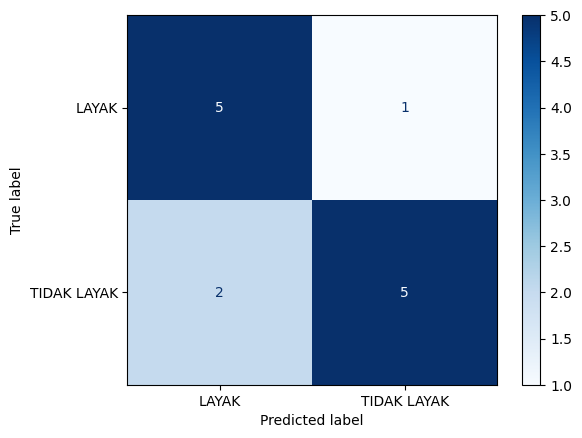

In [842]:
cmd.plot(cmap="Blues")

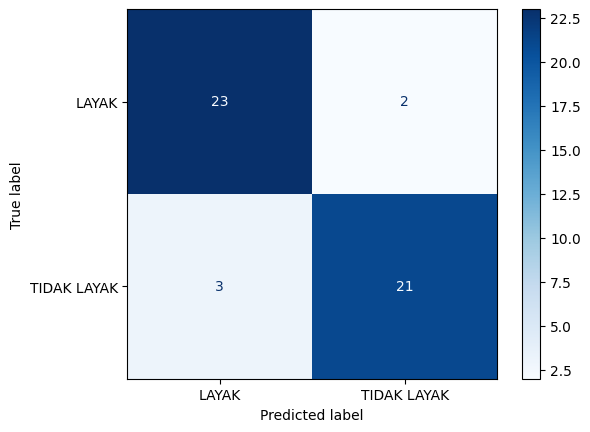

In [843]:
cnd.plot(cmap="Blues")

In [844]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       LAYAK       0.88      0.92      0.90        25
 TIDAK LAYAK       0.91      0.88      0.89        24

    accuracy                           0.90        49
   macro avg       0.90      0.90      0.90        49
weighted avg       0.90      0.90      0.90        49



In [845]:
from sklearn.metrics import classification_report
print(classification_report(y_test, u_test))

              precision    recall  f1-score   support

       LAYAK       0.71      0.83      0.77         6
 TIDAK LAYAK       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



In [846]:
# nb_clf.save_model('naive_bayes_model35.pkl')